## Benchmark model

### Train, test and validation split

IBM Stock train, test and validation split

In [66]:
train_size = int(len(df_ibm) * 0.90)
test_size = int(len(df_ibm) * 0.08)
valid_size = len(df_ibm) - (train_size + test_size)
df_ibm_train, df_ibm_test, df_ibm_valid = df_ibm[0:train_size].copy(),\
                                            df_ibm[train_size:train_size+test_size].copy(),\
                                            df_ibm[train_size+test_size:len(df_ibm)].copy()
print(len(df_ibm), len(df_ibm_train), len(df_ibm_test), len(df_ibm_valid))

14886 13397 1190 299


In [49]:
assert(len(df_ibm) == (len(df_ibm_train) + len(df_ibm_test) + len(df_ibm_valid)))

Amazon Stock train test split

In [50]:
train_size = int(len(df_amzn) * 0.90)
test_size = int(len(df_amzn) * 0.08)
valid_size = len(df_amzn) - (train_size + test_size)
df_amzn_train, df_amzn_test, df_amzn_valid = df_amzn[0:train_size].copy(),\
                                            df_amzn[train_size:train_size+test_size].copy(),\
                                            df_amzn[train_size+test_size:len(df_amzn)].copy()
print(len(df_amzn), len(df_amzn_train), len(df_amzn_test), len(df_amzn_valid))

5981 5382 478 121


In [51]:
assert(len(df_amzn) == (len(df_amzn_train) + len(df_amzn_test) + len(df_amzn_valid)))

Apple Inc. Stock train test split

In [72]:
train_size = int(len(df_aapl) * 0.90)
test_size = int(len(df_aapl) * 0.08)
valid_size = len(df_aapl) - (train_size + test_size)
df_aapl_train, df_aapl_test, df_aapl_valid = df_aapl[0:train_size].copy(),\
                                            df_aapl[train_size:train_size+test_size].copy(),\
                                            df_aapl[train_size+test_size:len(df_aapl)].copy()
print(len(df_aapl), len(df_aapl_train), len(df_aapl_test), len(df_aapl_valid))

10132 9118 810 204


Alphabet Inc. Stock train test split

In [73]:
train_size = int(len(df_googl) * 0.90)
test_size = int(len(df_googl) * 0.08)
valid_size = len(df_googl) - (train_size + test_size)
df_googl_train, df_googl_test, df_googl_valid = df_googl[0:train_size].copy(),\
                                            df_googl[train_size:train_size+test_size].copy(),\
                                            df_googl[train_size+test_size:len(df_googl)].copy()
print(len(df_googl), len(df_googl_train), len(df_googl_test), len(df_googl_valid))

4155 3739 332 84


#### Simple Moving Average (SMA)

Moving average is a techical indicator that smooths real data oscillations over time.
It can aid in determining if an asset price will continue or if it will reverse a bull or bear trend.

In this notebook, I'll use Simple Moving Average indicator as a benchmark model.
In order to do this, I will compute it separately on training data and test data, to avoid leakage.

SMA will be used in the project for three purposes:
* Detect if some seasonal pattern is present in data
* A benchmark for deep learning model performance
* An additional feature to be used to train deep learning model

Before moving to feature engineering, reference date index to be used to build the model will be defined:

In [74]:
analysis_start_date = '2010-01-1'

Anyway, new feature will be computed on the whole dataframe. Plotting will be limited to `analysis_start_date`

In [75]:
from ta_utils.technical_indicators import moving_average

#### IBM stock moving averages

In [76]:
# moving average sizes in days
ma_d_sz = [10,20,50]

# adding moving average columns to dataframe
for mds in ma_d_sz:
    column_name = "%s_ac_ma" %(str(mds))
    df_ibm[column_name] = moving_average(df_ibm['Adj Close'], window_size=mds)
    df_ibm_train[column_name] = moving_average(df_ibm_train['Adj Close'], window_size=mds)
    df_ibm_test[column_name] = moving_average(df_ibm_test['Adj Close'], window_size=mds)

In [77]:
df_ibm.head()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma
Date,,,,,,,,,
1962-01-02,7.713333,7.713333,7.626667,7.626667,1.858243,390000,NaN,NaN,NaN
1962-01-03,7.626667,7.693333,7.626667,7.693333,1.874485,292500,NaN,NaN,NaN
1962-01-04,7.693333,7.693333,7.613333,7.616667,1.855805,262500,NaN,NaN,NaN
1962-01-05,7.606667,7.606667,7.453333,7.466667,1.819257,367500,NaN,NaN,NaN
1962-01-08,7.460000,7.460000,7.266667,7.326667,1.785148,547500,NaN,NaN,NaN


Moving average feature is empty for the first *n* days, where *n* is the window size, so I'll use some backfill to fill NaN values

In [78]:
df_ibm.fillna(method='backfill', inplace=True)

In [79]:
df_ibm.head()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma
Date,,,,,,,,,
1962-01-02,7.713333,7.713333,7.626667,7.626667,1.858243,390000,1.831034,1.806507,1.787152
1962-01-03,7.626667,7.693333,7.626667,7.693333,1.874485,292500,1.831034,1.806507,1.787152
1962-01-04,7.693333,7.693333,7.613333,7.616667,1.855805,262500,1.831034,1.806507,1.787152
1962-01-05,7.606667,7.606667,7.453333,7.466667,1.819257,367500,1.831034,1.806507,1.787152
1962-01-08,7.460000,7.460000,7.266667,7.326667,1.785148,547500,1.831034,1.806507,1.787152


In [80]:
df_ibm_train.head()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma
Date,,,,,,,,,
1962-01-02,7.713333,7.713333,7.626667,7.626667,1.858243,390000,NaN,NaN,NaN
1962-01-03,7.626667,7.693333,7.626667,7.693333,1.874485,292500,NaN,NaN,NaN
1962-01-04,7.693333,7.693333,7.613333,7.616667,1.855805,262500,NaN,NaN,NaN
1962-01-05,7.606667,7.606667,7.453333,7.466667,1.819257,367500,NaN,NaN,NaN
1962-01-08,7.460000,7.460000,7.266667,7.326667,1.785148,547500,NaN,NaN,NaN


In [82]:
df_ibm_test.head()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma
Date,,,,,,,,,
2015-03-24,164.789993,164.889999,162.899994,163.000000,126.176285,4346100,NaN,NaN,NaN
2015-03-25,163.080002,163.080002,159.199997,159.199997,123.234795,5428900,NaN,NaN,NaN
2015-03-26,159.270004,161.250000,158.910004,160.589996,124.310753,4396000,NaN,NaN,NaN
2015-03-27,160.789993,160.899994,159.229996,160.399994,124.163673,3477900,NaN,NaN,NaN
2015-03-30,161.309998,163.600006,161.250000,162.669998,125.920868,4138000,NaN,NaN,NaN


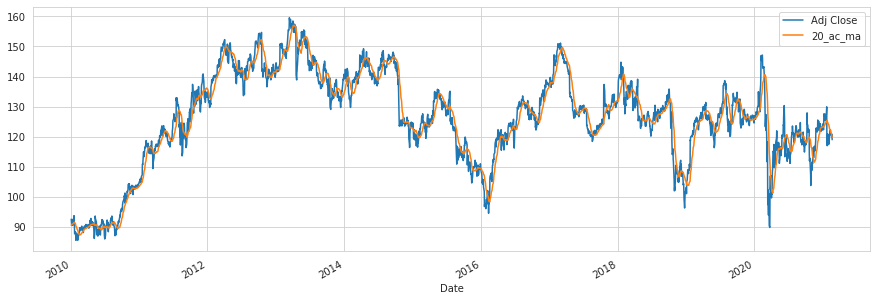

In [63]:
df_ibm[analysis_start_date:end][['Adj Close', '20_ac_ma']].plot(legend=True,figsize=(15,5))

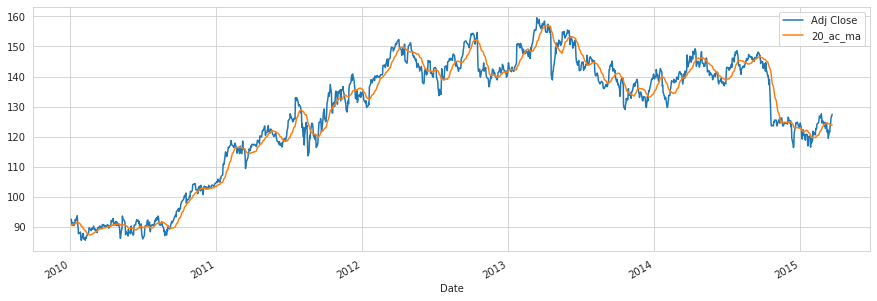

In [83]:
df_ibm_train[analysis_start_date:end][['Adj Close', '20_ac_ma']].plot(legend=True,figsize=(15,5))

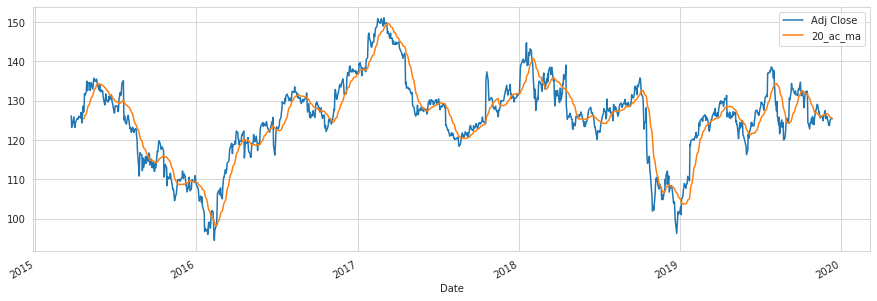

In [84]:
df_ibm_test[analysis_start_date:end][['Adj Close', '20_ac_ma']].plot(legend=True,figsize=(15,5))

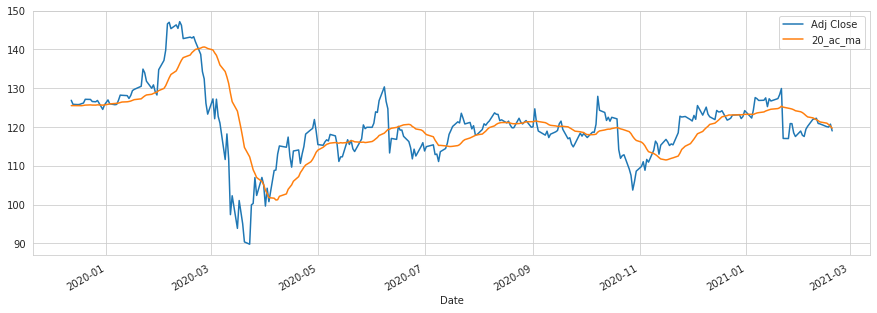

In [85]:
df_ibm_valid[analysis_start_date:end][['Adj Close', '20_ac_ma']].plot(legend=True,figsize=(15,5))

#### Apple stock moving averages

In [148]:
# moving average sizes in days
ma_d_sz = [10,20,50]

# adding moving average columns to dataframe
for mds in ma_d_sz:
    column_name = "%s_ac_ma" %(str(mds))    
    df_aapl[column_name] = moving_average(df_aapl['Adj Close'], window_size=mds)

In [149]:
df_aapl.head()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma
Date,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100922,469033600,NaN,NaN,NaN
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095657,175884800,NaN,NaN,NaN
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088636,105728000,NaN,NaN,NaN
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090830,86441600,NaN,NaN,NaN
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093463,73449600,NaN,NaN,NaN


Moving average feature is empty for the first *n* days, where *n* is the window size, so I'll use some backfill to fill NaN values

In [150]:
df_aapl.fillna(method='backfill', inplace=True)

In [151]:
df_aapl.tail()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma
Date,,,,,,,,,
2021-02-12,134.350006,135.529999,133.690002,135.369995,135.369995,60029300,135.522359,135.666208,131.056535
2021-02-16,135.490005,136.009995,132.789993,133.190002,133.190002,80206200,135.447374,135.978194,131.262408
2021-02-17,131.250000,132.220001,129.470001,130.839996,130.839996,97918500,135.052515,136.138230,131.424077
2021-02-18,129.199997,130.000000,127.410004,129.710007,129.710007,96648100,134.649500,136.032081,131.576925
2021-02-19,130.240005,130.710007,128.800003,129.869995,129.869995,87525900,133.917999,135.692292,131.703018


In [152]:
df_aapl.head()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma
Date,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100922,469033600,0.101975,0.108974,0.104248
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095657,175884800,0.101975,0.108974,0.104248
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088636,105728000,0.101975,0.108974,0.104248
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090830,86441600,0.101975,0.108974,0.104248
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093463,73449600,0.101975,0.108974,0.104248


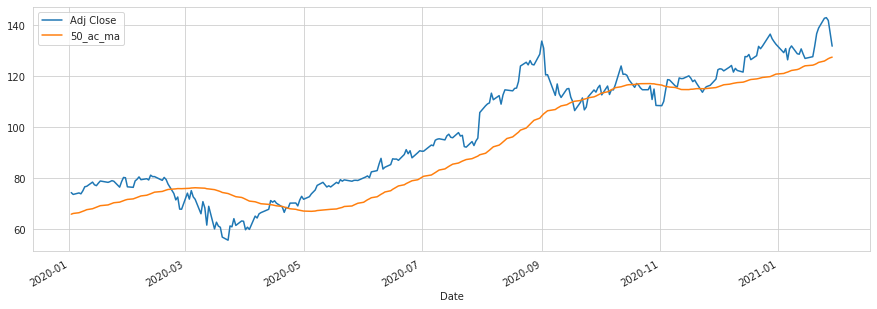

In [84]:
df_aapl[start_date:end_date][['Adj Close', '50_ac_ma']].plot(legend=True,figsize=(15,5))

#### Amazon.com stock moving averages

In [154]:
# moving average sizes in days
ma_d_sz = [10,20,50]

# adding moving average columns to dataframe
for mds in ma_d_sz:
    column_name = "%s_ac_ma" %(str(mds))    
    df_amzn[column_name] = moving_average(df_amzn['Adj Close'], window_size=mds)

In [155]:
df_amzn.head()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma,10_ac_bb_u,10_ac_bb_l,20_ac_bb_u,20_ac_bb_l,50_ac_bb_u,50_ac_bb_l
Date,,,,,,,,,,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,NaN,NaN,NaN,1.93311,1.261682,1.836333,1.313146,2.458803,1.086822
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,NaN,NaN,NaN,1.93311,1.261682,1.836333,1.313146,2.458803,1.086822
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,NaN,NaN,NaN,1.93311,1.261682,1.836333,1.313146,2.458803,1.086822
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,NaN,NaN,NaN,1.93311,1.261682,1.836333,1.313146,2.458803,1.086822
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,NaN,NaN,NaN,1.93311,1.261682,1.836333,1.313146,2.458803,1.086822


Moving average feature is empty for the first *n* days, where *n* is the window size, so I'll use some backfill to fill NaN values

In [156]:
df_amzn.fillna(method='backfill', inplace=True)

In [157]:
df_amzn.tail()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma,10_ac_bb_u,10_ac_bb_l,20_ac_bb_u,20_ac_bb_l,50_ac_bb_u,50_ac_bb_l
Date,,,,,,,,,,,,,,,
2021-02-12,3250.000000,3280.250000,3233.310059,3277.709961,3277.709961,2329300,3317.291968,3277.852979,3222.085181,3389.552311,3245.031625,3419.109022,3136.596935,3375.172588,3068.997774
2021-02-16,3254.050049,3308.300049,3253.590088,3268.949951,3268.949951,2563200,3309.898975,3286.087976,3223.393579,3385.571219,3234.226730,3401.585069,3170.590883,3376.951228,3069.835930
2021-02-17,3263.600098,3320.909912,3259.500000,3308.639893,3308.639893,3297500,3302.762964,3295.481970,3225.831777,3360.352910,3245.173017,3381.043039,3209.920902,3380.877493,3070.786062
2021-02-18,3282.419922,3338.000000,3273.939941,3328.229980,3328.229980,3027400,3304.332959,3298.724475,3229.144775,3363.927436,3244.738482,3384.078129,3213.370821,3385.745319,3072.544232
2021-02-19,3328.229980,3333.500000,3245.750000,3249.899902,3249.899902,4297200,3296.222949,3295.869971,3230.982773,3361.491566,3230.954332,3383.838238,3207.901704,3386.327284,3075.638263


In [158]:
df_amzn.head()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma,10_ac_bb_u,10_ac_bb_l,20_ac_bb_u,20_ac_bb_l,50_ac_bb_u,50_ac_bb_l
Date,,,,,,,,,,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,1.597396,1.57474,1.772813,1.93311,1.261682,1.836333,1.313146,2.458803,1.086822
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,1.597396,1.57474,1.772813,1.93311,1.261682,1.836333,1.313146,2.458803,1.086822
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,1.597396,1.57474,1.772813,1.93311,1.261682,1.836333,1.313146,2.458803,1.086822
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,1.597396,1.57474,1.772813,1.93311,1.261682,1.836333,1.313146,2.458803,1.086822
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,1.597396,1.57474,1.772813,1.93311,1.261682,1.836333,1.313146,2.458803,1.086822


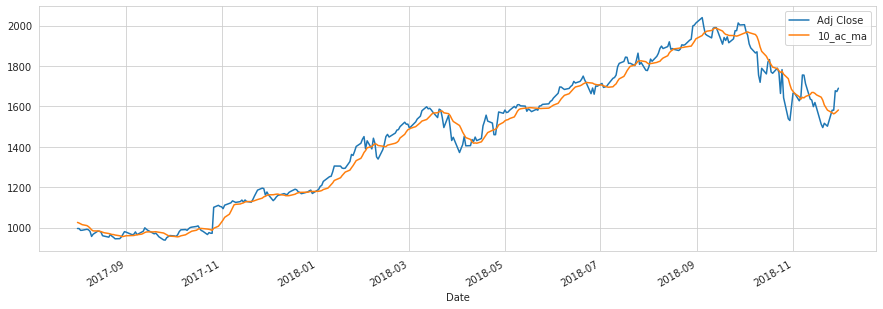

In [159]:
df_amzn[start_date:end_date][['Adj Close', '10_ac_ma']].plot(legend=True,figsize=(15,5))

#### Alphabet Inc. stock moving averages

In [160]:
# moving average sizes in days
ma_d_sz = [10,20,50]

# adding moving average columns to dataframe
for mds in ma_d_sz:
    column_name = "%s_ac_ma" %(str(mds))    
    df_googl[column_name] = moving_average(df_googl['Adj Close'], window_size=mds)

In [161]:
df_googl.head()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma
Date,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,NaN,NaN,NaN
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,NaN,NaN,NaN
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,NaN,NaN,NaN
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,NaN,NaN,NaN
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,NaN,NaN,NaN


Moving average feature is empty for the first *n* days, where *n* is the window size, so I'll use some backfill to fill NaN values

In [162]:
df_googl.fillna(method='backfill', inplace=True)

In [163]:
df_googl.tail()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma
Date,,,,,,,,,
2021-02-12,2079.770020,2099.500000,2073.570068,2095.030029,2095.030029,948500,2044.369971,1945.714978,1834.833992
2021-02-16,2091.750000,2145.139893,2091.750000,2110.699951,2110.699951,1548900,2066.132971,1964.868976,1840.548591
2021-02-17,2093.979980,2122.439941,2088.350098,2118.620117,2118.620117,1014700,2086.082983,1981.576483,1846.484194
2021-02-18,2105.000000,2121.989990,2093.330078,2105.810059,2105.810059,1127300,2090.776001,1992.863489,1852.125195
2021-02-19,2107.790039,2118.580078,2083.429932,2088.810059,2088.810059,1866100,2094.294019,2003.096490,1857.560796


In [164]:
df_googl.head()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma
Date,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,52.432933,52.692943,63.586987
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,52.432933,52.692943,63.586987
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,52.432933,52.692943,63.586987
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,52.432933,52.692943,63.586987
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,52.432933,52.692943,63.586987


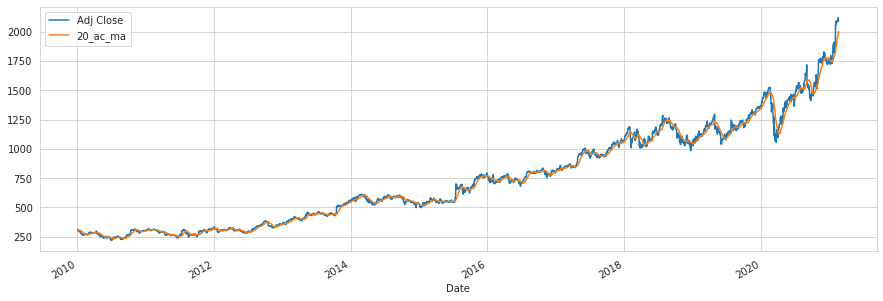

In [165]:
df_googl[analysis_start_date:end][['Adj Close', '20_ac_ma']].plot(legend=True,figsize=(15,5))

### Metrics computation

Computing metrics on the benchmark model will give me a good reference to evaluate the deep learning model after training.

In [239]:
from sklearn.metrics import mean_squared_error

#### IBM stock

In [240]:
ibm_10ma_mse_loss = mean_squared_error(df_ibm['Adj Close'], df_ibm['10_ac_ma'])

In [241]:
print(ibm_10ma_mse_loss)

2.354752483925547


In [242]:
ibm_20ma_mse_loss = mean_squared_error(df_ibm['Adj Close'], df_ibm['20_ac_ma'])

In [243]:
print(ibm_20ma_mse_loss)

5.103982705879878


In [244]:
ibm_50ma_mse_loss = mean_squared_error(df_ibm['Adj Close'], df_ibm['50_ac_ma'])

In [245]:
print(ibm_50ma_mse_loss)

11.563776781273132


#### Apple Inc. stock

In [256]:
aapl_10ma_mse_loss = mean_squared_error(df_aapl['Adj Close'], df_aapl['10_ac_ma'])

In [257]:
print(aapl_10ma_mse_loss)

0.5904003486257521


In [258]:
aapl_20ma_mse_loss = mean_squared_error(df_aapl['Adj Close'], df_aapl['20_ac_ma'])

In [260]:
print(aapl_20ma_mse_loss)

1.2972070531787763


In [261]:
aapl_50ma_mse_loss = mean_squared_error(df_aapl['Adj Close'], df_aapl['50_ac_ma'])

In [262]:
print(aapl_50ma_mse_loss)

3.92653150934996


#### Amazon.com stock

In [246]:
amzn_10ma_mse_loss = mean_squared_error(df_amzn['Adj Close'], df_amzn['10_ac_ma'])

In [253]:
print(amzn_10ma_mse_loss)

695.4867445525978


In [254]:
amzn_20ma_mse_loss = mean_squared_error(df_amzn['Adj Close'], df_amzn['20_ac_ma'])

In [255]:
print(amzn_20ma_mse_loss)

1420.5802644474145


In [250]:
amzn_50ma_mse_loss = mean_squared_error(df_amzn['Adj Close'], df_amzn['50_ac_ma'])

In [252]:
print(amzn_50ma_mse_loss)

3641.462961696154


#### Alphabet Inc. stock

In [263]:
googl_10ma_mse_loss = mean_squared_error(df_googl['Adj Close'], df_googl['10_ac_ma'])

In [264]:
print(googl_10ma_mse_loss)

386.4951901295182


In [265]:
googl_20ma_mse_loss = mean_squared_error(df_googl['Adj Close'], df_googl['20_ac_ma'])

In [268]:
print(googl_20ma_mse_loss)

848.8287162842605


In [266]:
googl_50ma_mse_loss = mean_squared_error(df_googl['Adj Close'], df_googl['50_ac_ma'])

In [267]:
print(googl_50ma_mse_loss)

2111.4464762363505


As expected, loss augments as we observe moving average on larger windows